In [1]:
########### What is a Category Data Type? ###########

In [2]:
import pandas as pd
import os

In [3]:
os.chdir('C:\\Users\\sstallworth\\Desktop\\Python Programming Course')
os.getcwd()

'C:\\Users\\sstallworth\\Desktop\\Python Programming Course'

In [4]:
movies = pd.read_csv('Movie-Ratings.csv')

In [5]:
len(movies)

559

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating',\
                 'BudgetMillions','Year']

In [9]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
# Film and Genre are object data types 
# Year is assigned integer data type
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
# Mathmatical operations don't make sense for Year
# Year is not meant to be numeric variable, meant to be categorical 
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
# Convert to category 
movies.Film = movies.Film.astype('category')

In [13]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
# Now Film is reconized as a category
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [15]:
# Convert other columns to categories 
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [16]:
# Get unique values of a category
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
# See that Year is no longer included 
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [18]:
########### Working with JointPlots ###########

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Jointplots
# Jointplot is a scatterplot which shows you if there is a relationship between two variables
# Also have distributions of each of the individual variables on the top and right 
# Hex is useful because it groups dots, cluster associated with distributions 

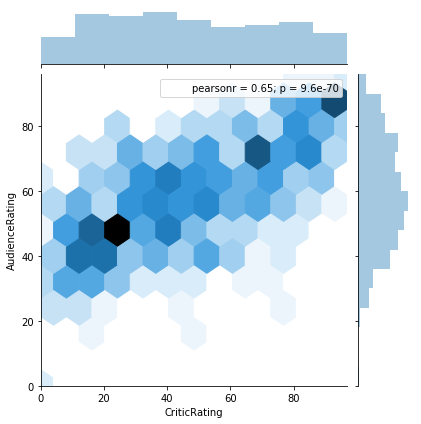

In [21]:
#<<<<< Chart 1 
j = sns.jointplot(data=movies, x='CriticRating',y='AudienceRating', kind='hex')

In [22]:
########### Histograms ###########

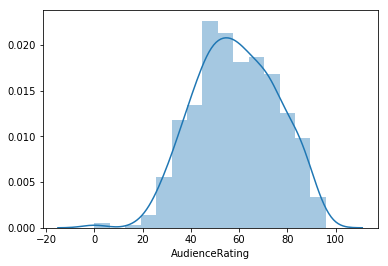

In [23]:
# Already know this method:
# Seaborn
m1 = sns.distplot(movies.AudienceRating, bins=15)

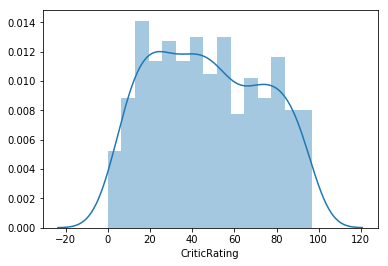

In [24]:
# Bring the grid back 
# sns.set_style("darkgrid")
m1 = sns.distplot(movies.CriticRating, bins=15)

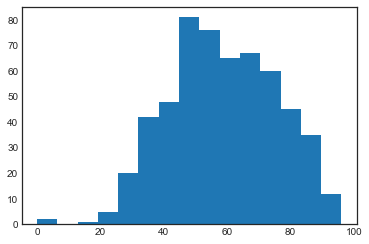

In [25]:
#<<<<< Chart 2 

# Pyplot only
# Audience Rating normally distributed

sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=15)

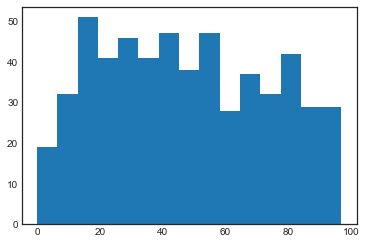

In [26]:
#<<<<< Chart 3 
# Style is set for the instance you're running, only have to set once 

# Critic Rating not normally distributed
n1 = plt.hist(movies.CriticRating, bins=15)

In [27]:
########### Stacked Histograms ###########

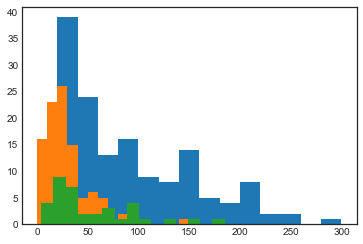

In [28]:
# Layered historgram 
# Call hist() function for each series separately to layer on top
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

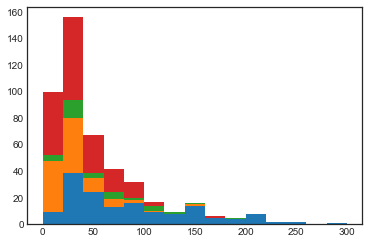

In [29]:
# Stacked histogram 
# Pass the hist() function two series in a list at one time 
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
         movies[movies.Genre == 'Drama'].BudgetMillions, \
         movies[movies.Genre == 'Thriller'].BudgetMillions,  \
         movies[movies.Genre == 'Comedy'].BudgetMillions], \
         bins=15, stacked=True)
plt.show()

In [30]:
for gen in movies.Genre.cat.categories: 
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


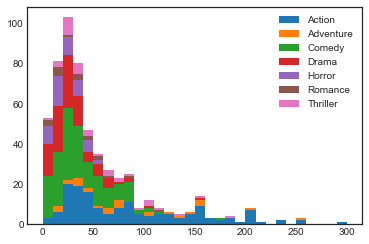

In [31]:
#<<<<< Chart 4 

# Could also create empty list like this: list1 = []
# Creating a list of the multiple series 
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories: 
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label = mylabels)
plt.legend()
plt.show()

In [32]:
########### Creating a KDE Plot ###########

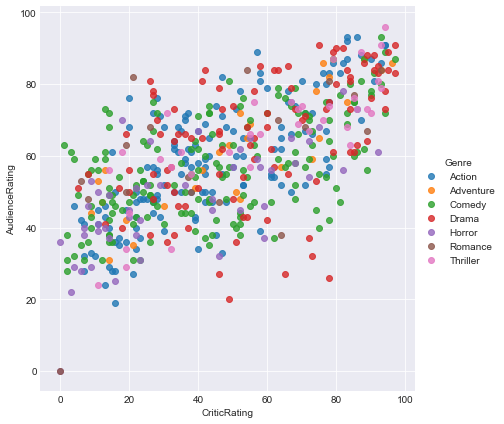

In [33]:
# Scatterplot
# aspect=1 is good because the grid are actually square
sns.set_style("darkgrid")
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre', \
                 size=6, aspect=1)

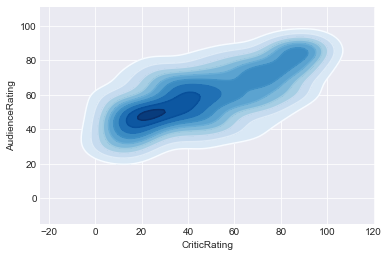

In [34]:
# KDE Plot
# Same chart as scatterplot above, but instead of the dots has the kernel density estimate 
# Bivariate distribution, allows us to quickly assess it  
# KDE plot showing you where the most density is 
# And how density is distributed across the chart
# Further away from the "kernel" or center, means the density is lower/fading away

# Shading
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues')

# TIP:
# Overlay outline around the edge of separate regions 
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                cmap='Blues')

In [35]:
########### Working with Subplots() ###########

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

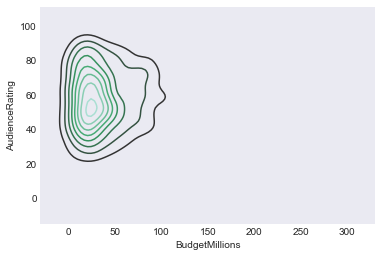

In [37]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

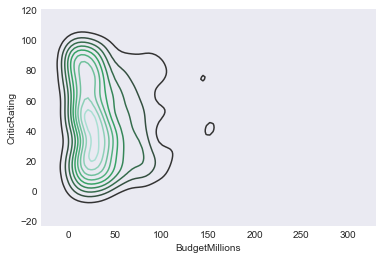

In [38]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

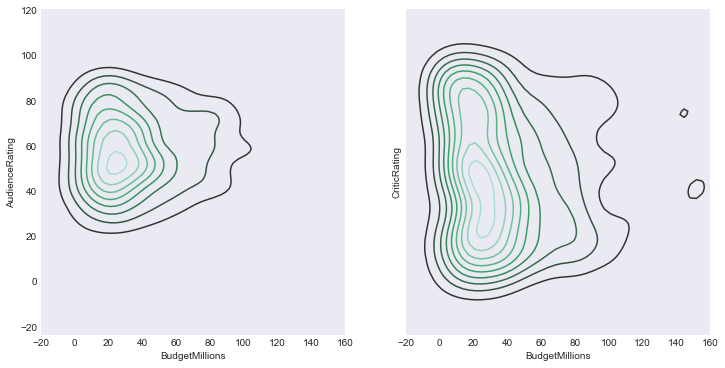

In [39]:
# Create subplot of 1 row, 2 columns
# Function returns two values
# f is the figure, the whole object
# axes is the array from which you can access each chart 

# Create a 1-dimensional array/set of subplots
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True) 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

# Create a 2-dimensional array/set of subplots 
# Would have to supply 2 indices in the ax argument
# f, axes = plt.subplots(2,2, figsize=(12,6)) 
# k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[1,1])
# k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,0])

# sharex = True so k2 will copy this 
k1.set(xlim = (-20,160))

# Audience Rating more compact, Critic Rating more spread out 

In [40]:
########### Violin Plots vs Boxplots ###########

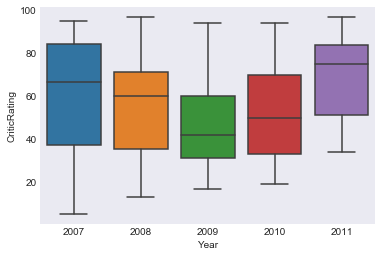

In [41]:
# Box Plot
# Can see quartiles, part that is smaller means more observations fall into it 

# All genres
# z = sns.boxplot(data=movies, x='Genre',y='CriticRating')

# Subset 
z = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating')

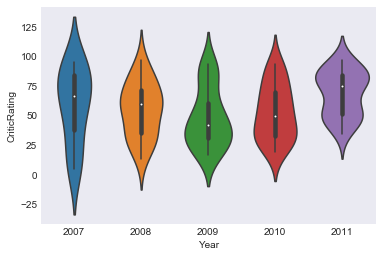

In [42]:
# ViolinPlots
# Shows you the width, more observations can be found in that area 
# Symmetrical types of concentration, concentration above and below

# All genres
# z = sns.violinplot(data=movies, x='Genre',y='CriticRating')

# Subset 
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating')

In [43]:
########### Creating a Facet Grid ###########

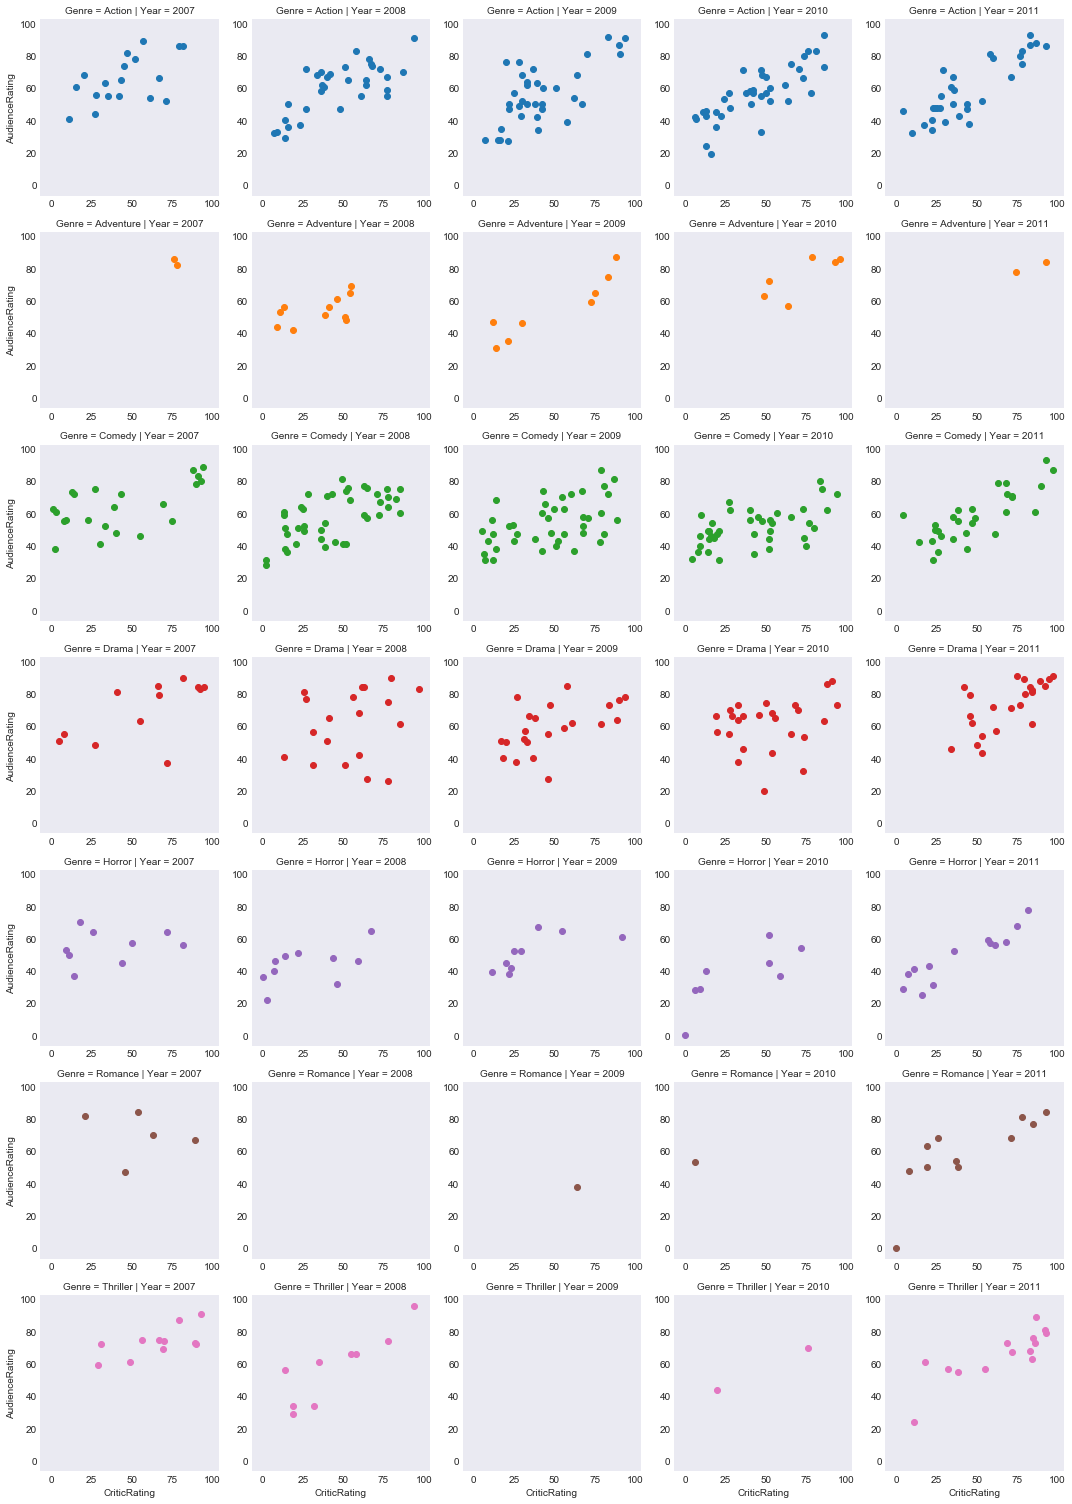

In [44]:
# Facet Grid splitting a visualization based on some sort of rule
# Populated automatically based on the rules you specify 
# Different from subplots because you can't populate them with different things

# Creating blank facet grid
# g = sns.FacetGrid(movies, row='Genre',hue='Genre')
g = sns.FacetGrid(movies, row='Genre', col = 'Year', hue='Genre')

# Map this construct onto facet grid that was prepared 
# plt.scatter(movies.CriticRating, movies.AudienceRating)

# g.map(func, *args, **kwargs)
# Already specifying dataset above, just pass in column names 
g = g.map(plt.scatter, "CriticRating", "AudienceRating")

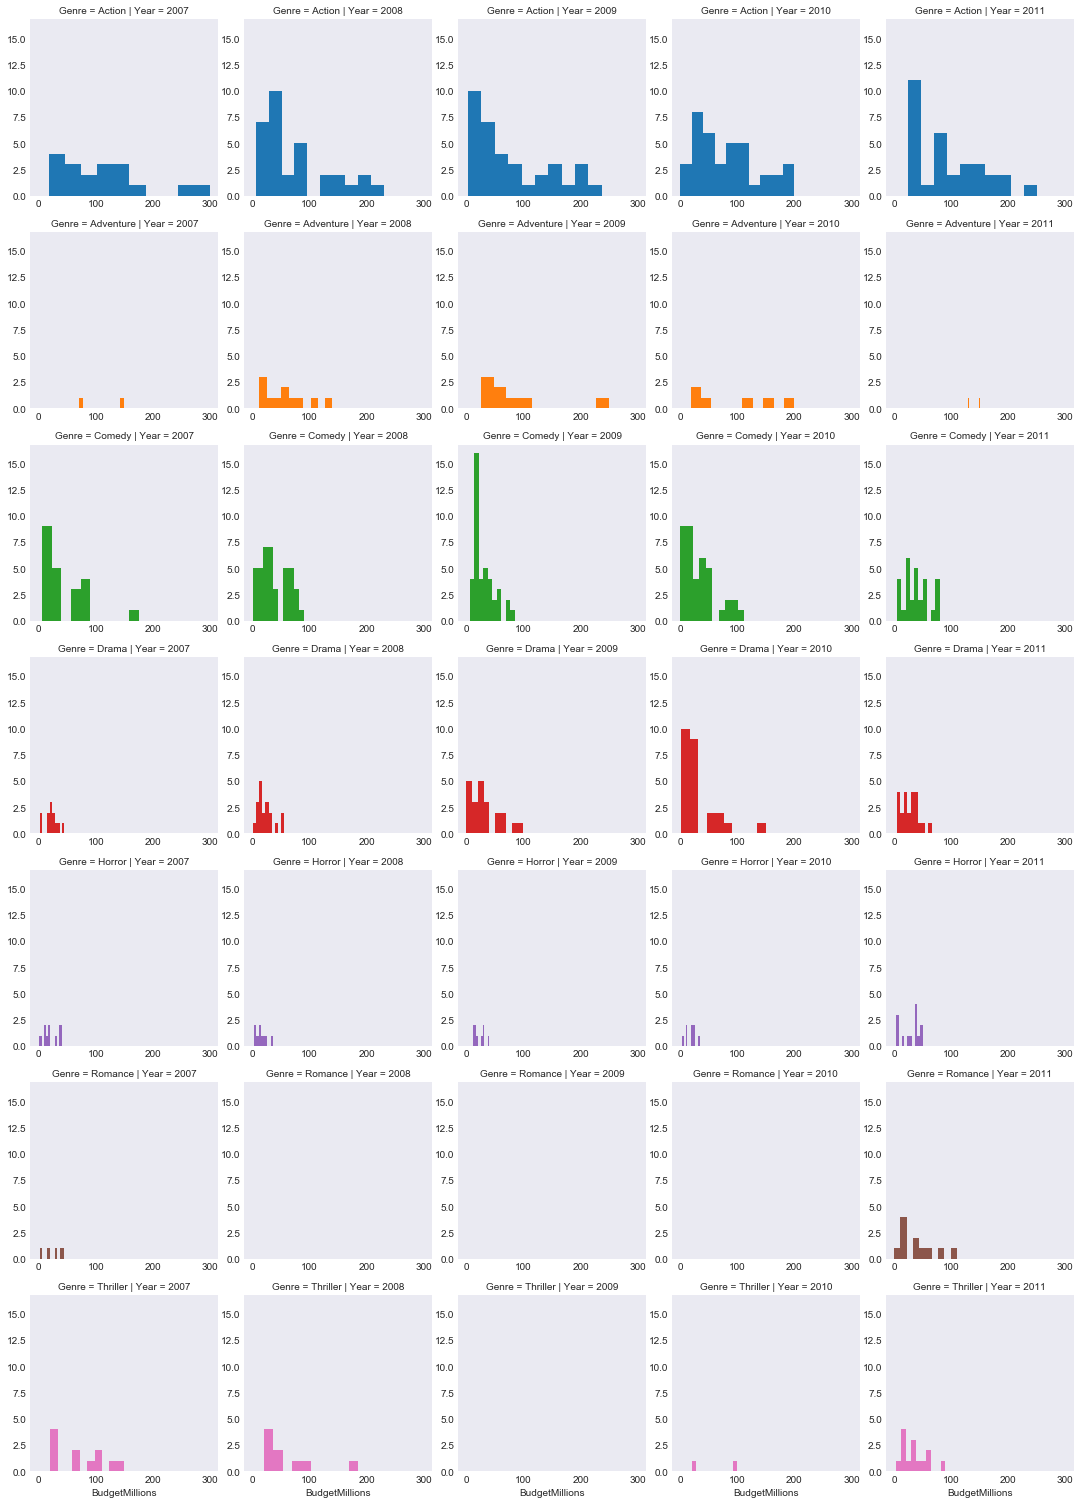

In [45]:
# Can populate with any type of chart. Example: histograms
# Just need one column for histograms 
g = sns.FacetGrid(movies, row='Genre', col = 'Year', hue='Genre')
g = g.map(plt.hist, "BudgetMillions")

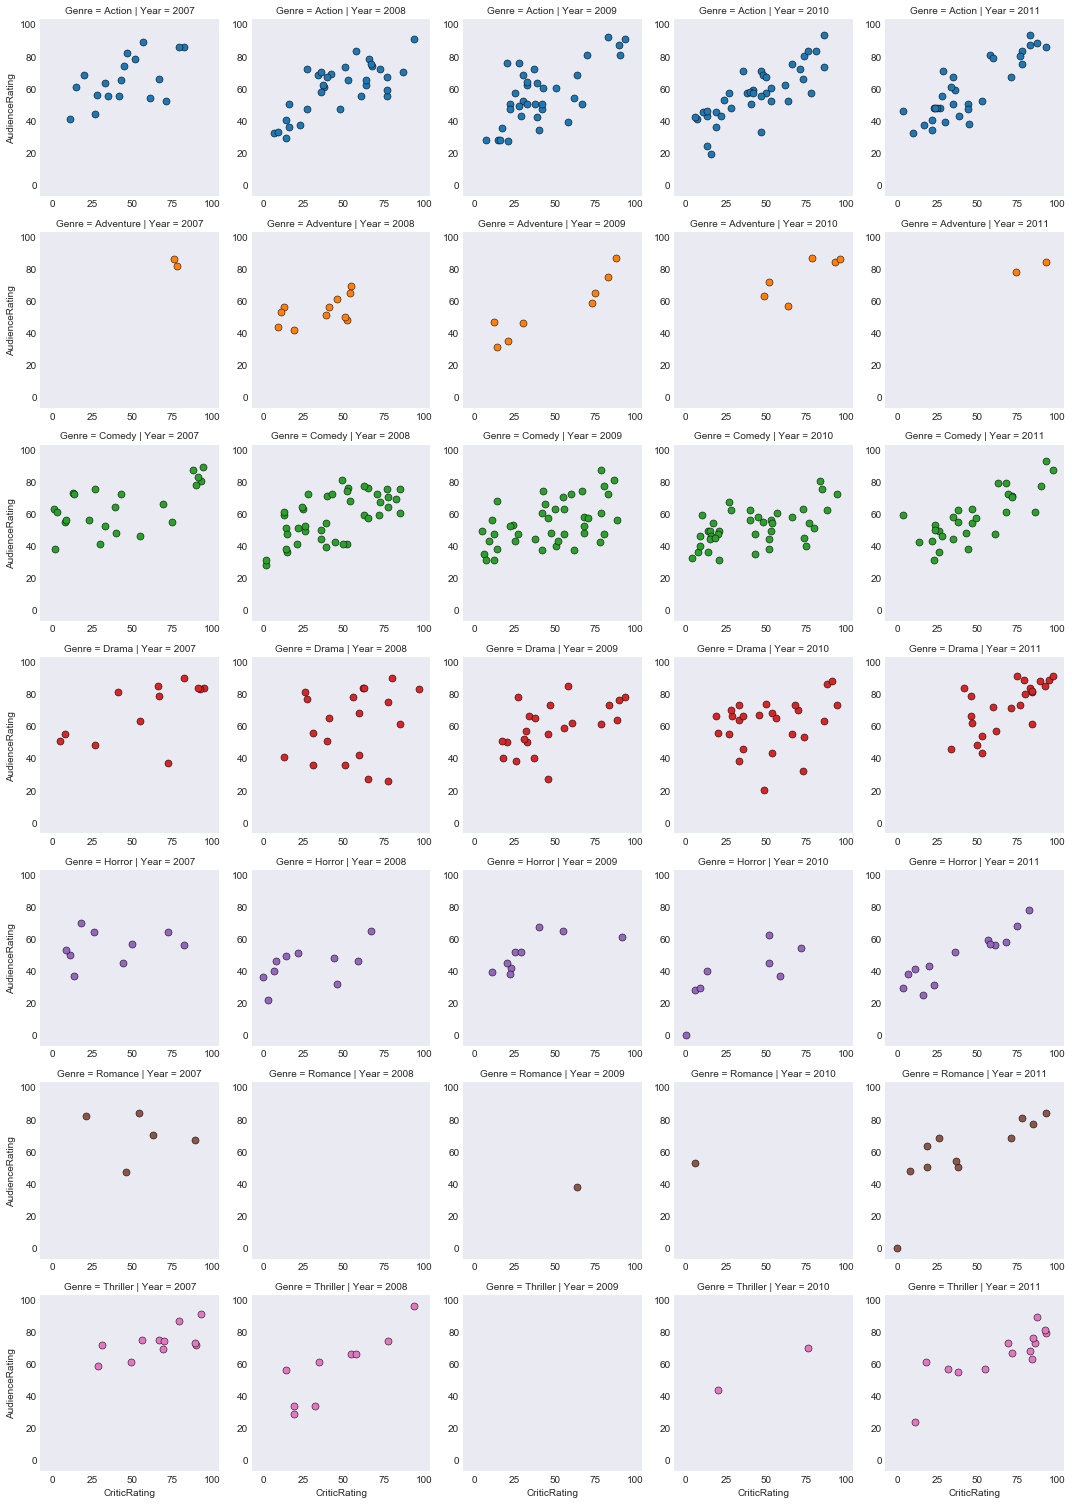

In [46]:
# Back to the scatterplots: 
g = sns.FacetGrid(movies, row='Genre', col = 'Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, "CriticRating","AudienceRating", **kws)

In [47]:
########### Coordinates and Diagonals ###########

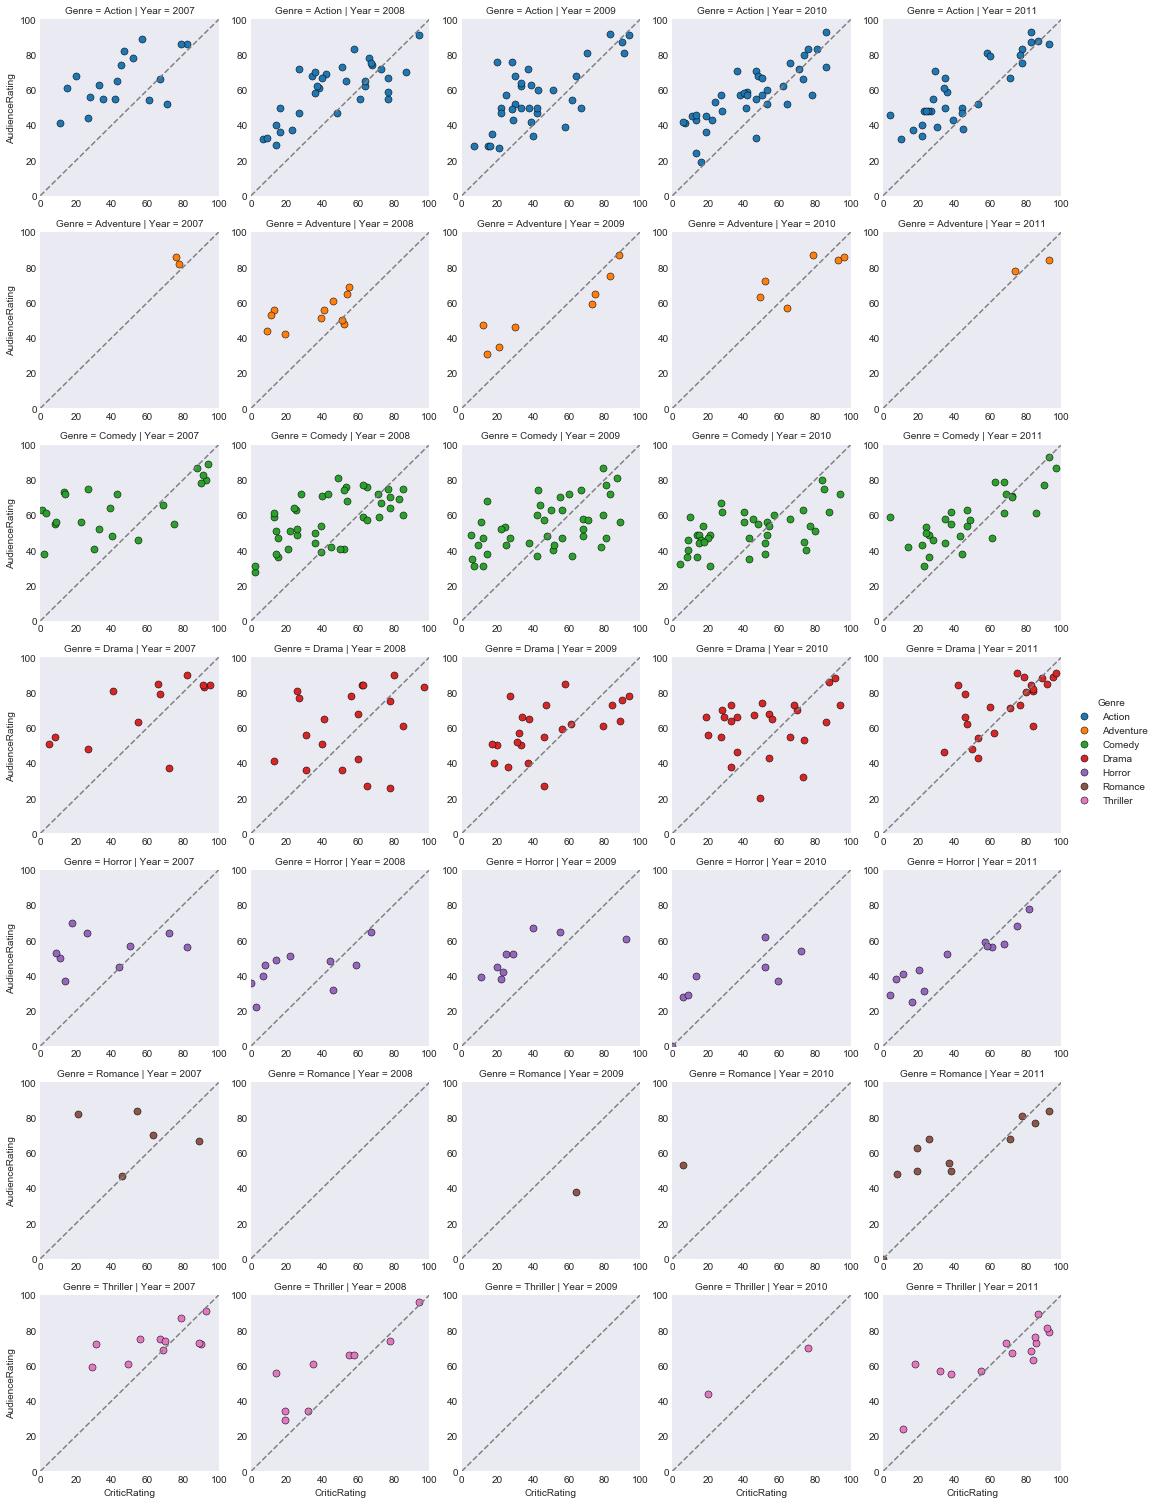

In [48]:
# Controlling Axes and Adding Diagonals
# Diagonals are a tool to help us analyze the charts better 
# Pro Tip: Can drag chart as an image

#<<<<< Chart 5 
g = sns.FacetGrid(movies, row='Genre', col = 'Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, "CriticRating","AudienceRating", **kws)

g.set(xlim=(0,100), ylim =(0,100))

# g.axes is an array that contains each element (chart) of the facet grid
# Can flatten out the array to iterate over it as if it were a simple list 
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray", ls="--") # plot a line on each one 
    
g.add_legend()

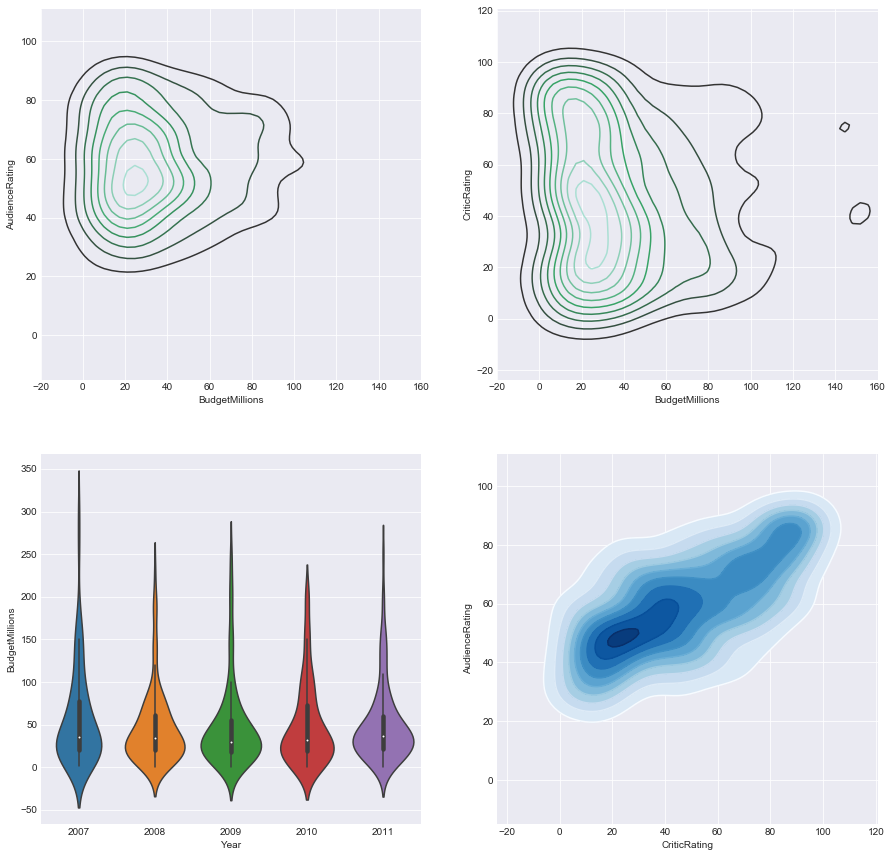

In [49]:
########### Extra: Building Dashboards in Python ###########

# Imports
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Create empty 2D subplot
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize =(15,15))

###### Plot [0,0] ######
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 ax=axes[0,0])

###### Plot [0,1] ######
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 ax=axes[0,1])

# Limit axis for KDE charts since they do not share
k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))

###### Plot[1,0] ######
# Add violin plot
# z = sns.violinplot(data=movies[movies.Genre=='Drama'], \
#                    x='Year',y='CriticRating', ax = axes[1,0])

z = sns.violinplot(data=movies, \
                   x='Year',y='BudgetMillions', ax = axes[1,0])


###### Plot[1,1] ######
# Can plot two "plots" in the same space 
# Shading/Filling
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues',\
                 ax = axes[1,1])

# TIP: Outline
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Blues'\
                  , ax=axes[1,1])

## Non-Seaborn Plots ##
# For non-seaborn plots procedure is different
# Specify axes indices first THEN the function
# Axes is a pyplot generated object, created within the pyplot package
# Seaborn is an add-on to pyplot
# Therefore axes has no way of knowing about things that are contained within the seaborn package 
# Axes has no visbility of kdeplot, violinplot, and so on 
# So can't call axes[N,N].violinplot() like below
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

# axes[1,1].hist(movies.CriticRating, bins=15)

plt.show()


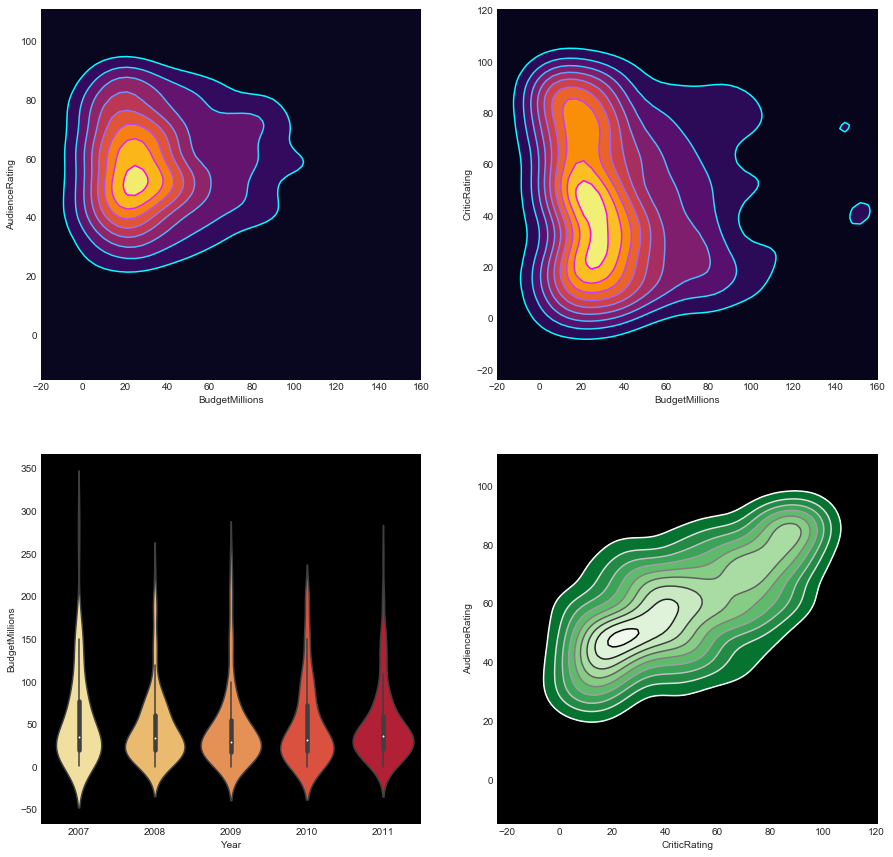

In [50]:
########### Extra: Styling Tips ###########
# Styling Dashboards

# Imports 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Chart background
sns.set_style("dark", {"axes.facecolor":"black"}) # white, whitegrid, dark, darkgrid, ticks

# Create empty 2D subplot
f, axes = plt.subplots(2,2, figsize =(15,15))

###### Plot [0,0] ######
# If you make a typo in cmap argument will list possible values in Error message
# Add "_r" to reverse the order in the color map 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap = "inferno",\
                 ax=axes[0,0])

k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 # shade=True, shade_lowest=True, 
                 cmap = "cool",\
                 ax=axes[0,0])

###### Plot [0,1] ######
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 shade=True, shade_lowest=True, cmap = "inferno",\
                 ax=axes[0,1])

k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 # shade=True, shade_lowest=True, 
                 cmap = "cool",\
                 ax=axes[0,1])

###### Plot[1,0] ######
z = sns.violinplot(data=movies, x='Year',y='BudgetMillions', ax = axes[1,0],\
                  palette='YlOrRd')

###### Plot[1,1] ######
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, \
                 cmap='Greens_r',\
                 ax = axes[1,1])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 # shade=True, shade_lowest=False, \
                 cmap='gist_gray_r',\
                 ax = axes[1,1])

# Limit axis for KDE charts since they do not share
k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))

plt.show()

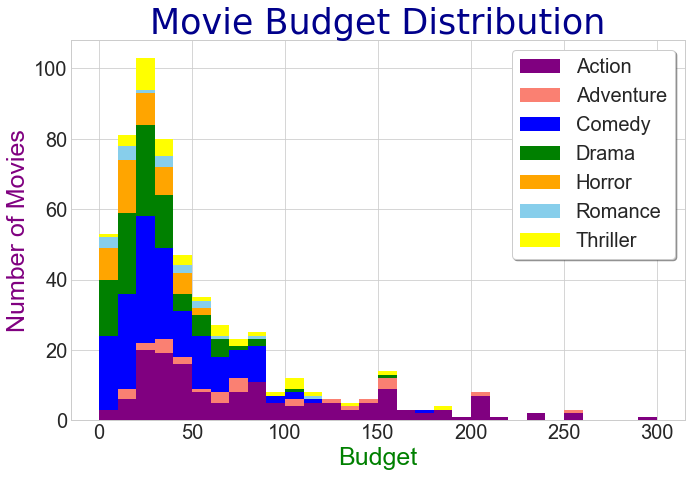

In [51]:
########### Extra: Finishing Touches ###########
# Thematic Edits (Chart 4 Example)

# Using just pyplot to create chart
# Non-seaborn visualziation
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories: 
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

# Can still use seaborn to change grid style
sns.set_style("whitegrid")

# Pro tip for controlling figure size: 
# Create subplot with only one item
fig, ax = plt.subplots()

# If you just plot something and don't specify where it should go
# Chart will always go in the last box 
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label = mylabels, \
             color = ['Purple','Salmon','Blue','Green','Orange','SkyBlue','Yellow'])

# Now can easily change size of entire figure
fig.set_size_inches(11,7, 8.27) # size of A4 paper

# Add title
plt.title("Movie Budget Distribution", fontsize=35,\
         color="DarkBlue", fontname="Console")

# Axis labels
plt.ylabel("Number of Movies", fontsize=25, color="Purple")
plt.xlabel("Budget", fontsize=25, color="Green")

# Tick size
# More customization available 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Foramt legend
plt.legend()
plt.legend(frameon=True, fancybox=True, shadow=True,\
           framealpha=1, prop={'size':20})

# "Print" plot
plt.show()


**RGBA Color Options**  
aqua, aquamarine, azure, beige, black, blue, brown, chartreuse, chocolate, coral, crimson, cyan, darkblue, darkgreen, fuchsia, gold, goldenrod, green, grey, indigo, ivory, khaki, lavender, lightblue, lightgreen, lime, magenta, maroon, navy, olive, orange, orangered, orchid, pink, plum, purple, red, salmon, sienna, silver, tan, teal, tomato, turquoise, violet, wheat, white, yellow yellowgreen